# Exam7

## [File management, basic python, data structures]
A dump from a SQL database designed for in-silico drug repurposing experiments contains two textual tab-separated files, namely `cell_mutation.tsv` and `ic50.tsv`.
The `cell_mutation.tsv` file contains a list of pairs *cell_line - gene*; each pair indicates that the cell_line harbours a mutation on the gene.
The `ic50.tsv` file contains triplets <*cell line, drug, ic50*> and indicates the ic50 score (a typical measure for the drug response) of the drug on the cell line.

In [2]:
# creating the files to test the code
with open('cell_mutation.tsv', 'w') as f:
    f.write('''cell gene
MCF7    ADAM17
MCF7    ALPK1
K562    CBL
K562    CIT''')

with open('ic50.tsv', 'w') as f:
    f.write('''cell drug    ic50
MCF7    tamoxifen   4.506
K562    tamoxifen   30.1
MCF7    Bicalutamide    7.54
K562    Bicalutamide    10.537''')

**A)** Load the `cell_mutation.tsv` file into a dictionary `mut`, with the format *{cell: [list mutated genes]}*;
load the ic50.tsv file into a list of tuples scores (e.g., [(cell, drug,
score), (..,..,..)]). Mind the header in both file.

In [1]:
mut = {}
with open('cell_mutation.tsv', 'r') as mf:
    mf.readline()
    for line in mf.readlines():
        line = line.strip().split('\t')
        if line[0] not in mut:
            mut[line[0]] = [line[1]]
        else:
            mut[line[0]].append(line[1])

scores = []
with open('ic50.tsv', 'r') as sf:
    sf.readline()
    for line in sf.readlines():
        line = line.strip().split('\t')
        scores.append((line[0], line[1], float(line[2])))

print(mut)
print(scores)

{'MCF7': ['ADAM17', 'ALPK1'], 'K562': ['CBL', 'CIT']}
[('MCF7', 'tamoxifen', 4.506), ('K562', 'tamoxifen', 30.1), ('MCF7', 'Bicalutamide', 7.54), ('K562', 'Bicalutamide', 10.537)]


**B)** Implement a function `with_mutation(gene_id)` that takes as input a string representing an identifier of a gene, analyses the `mut` dictionary and returns the (possibly empty) list of cell lines harbouring a mutation on that gene

In [4]:
def with_mutation(gene):
    cells = []
    for k, v in mut.items():
        if gene in v:
            cells.append(k)
    return cells

with_mutation('ALPK1')

['MCF7']

**C)** Implement a function `sensitive_to(drug_name)` that takes as input a drug name and analyses the scores list. If `drug_name` is not present in the list, then a built-in `ValueError` exception is raised. Otherwise, the function firstly computes the mean IC50 of the input drug across all the cell lines and finally returns the list of cell lines which IC50 score (associated to the input drug) is lower than the computed mean.

In [5]:
def sensitive_to(drug_name):
    drug_names = [t[1] for t in scores]
    if drug_name not in drug_names:
        raise ValueError('drug_name not in list of drugs')
    else:
        drug_scores = [t[2] for t in scores if t[1] == drug_name]
        scores_mean = sum(drug_scores)/len(drug_scores)
        cells = [t[0] for t in scores if t[1] == drug_name and
                                         t[2] <= scores_mean]
    return cells

print(sensitive_to('tamoxifen'))
print(sensitive_to('Bicalutamide'))
#sensitive_to('stammoxifenn') # -> gives error
    

['MCF7']
['MCF7']


**D)** Implement a `compare(drug1, drug2)` function that takes as input two drug identifiers, analyses the list scores and draws the two boxplots of the IC50 scores to the two drugs.

In [7]:
import matplotlib.pyplot as plt

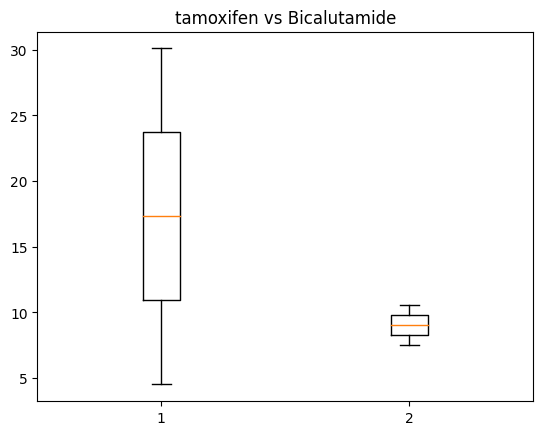

In [10]:
def compare(drug1, drug2):
    drug1_scores = [t[2] for t in scores if t[1] == drug1]
    drug2_scores = [t[2] for t in scores if t[1] == drug2]
    plt.boxplot([drug1_scores,drug2_scores])
    plt.title(f'{drug1} vs {drug2}')
    plt.show()

compare('tamoxifen', 'Bicalutamide')

## [Object Oriented]

Implement the class `MyContainer`, that has an attribute list (initially empty), an attribute `maxElem` and an attribute `minElem` that represent the minimum and the maximum elements in the list and are both initially set to `None`. `MyContainer` also has a method `add_elem(x)` that adds the element x to the list and eventually updates the value of the `min` and `max` element.<br>

Implement `MyBatchContainer` class, that extends `MyContainer` and provides the `add_batch(list_of_elements)` method, which allows the user to add many elements at once, passing them as a list. It is required to implement the new method by using the `MyContainer.add_elem` method, rather than directly accessing and updating the class attributes.

In [12]:
class MyContainer:
    # attributes
    lst = []
    maxElem = None
    minElem = None
    
    # methods
    def __init__(self):
        pass
    
    def add_elem(self, x):
        self.lst.append(x)
        if self.maxElem == None or self.maxElem < x:
            self.maxElem = x
        if self.minElem == None or self.minElem > x:
            self.minElem = x

class MyBatchContainer(MyContainer):
    def add_batch(self, list_of_elements):
        for x in list_of_elements:
            super().add_elem(x)

In [13]:
c = MyContainer()
print(c.maxElem)
print(c.minElem)
c.add_elem(3)
print(c.maxElem)
print(c.minElem)
c.add_elem(10)
print(c.maxElem)
print(c.minElem)

None
None
3
3
10
3



### [Recursion]
The int built-in python function parses a valid string (e.g., “123”) into the corresponding integer. Implement recInt(string), a recursive version of the int
function.  
If the input string is not valid (e.g., “1ab”) then the function prints an error message and returns None.

In [18]:
numbers = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4,
           '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
def recInt(string):
    if len(string) == 0:
        return None
    if string[-1] not in numbers:
        raise ValueError('Not valid integer')
    if len(string) == 1:
        return numbers[string]
    else:
        return 10*recInt(string[:-1]) + numbers[string[-1]]
        

In [23]:
recInt('1097658')
# recInt('35abcu2w38') # -> raises an error

1097658